In [24]:
import pandas as pd
import seaborn as sns

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
data_users = pd.read_table("ml-1m/users.dat", sep="::", engine="python", names=unames)
data_users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
data_ratings = pd.read_table("ml-1m/ratings.dat", sep="::", engine="python", names=rnames)
data_ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
mnames = ['movie_id', 'title', 'genre']
data_movies = pd.read_table("ml-1m/movies.dat", sep="::", engine="python", encoding="windows-1251", names=mnames)
data_movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [15]:
users_ratings_merge = data_users.merge(data_ratings, left_on='user_id', right_on='user_id')
users_ratings_merge

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [16]:
all_merged = users_ratings_merge.merge(data_movies, left_on='movie_id', right_on='movie_id')
all_merged

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [17]:
ages = data_users.sort_values('age')
ages = data_users.age.unique()
ages

array([ 1, 56, 25, 45, 50, 35, 18], dtype=int64)

In [18]:
age_separation = all_merged.pivot_table('rating', index = 'title', columns = ['age', 'gender'], aggfunc = 'mean')
age_separation.head(10)

age                                      1                   18            \
gender                                    F         M         F         M   
title                                                                       
$1,000,000 Duck (1971)                  NaN       NaN  5.000000  2.600000   
'Night Mother (1986)               3.000000  1.000000  4.500000  5.000000   
'Til There Was You (1997)          2.000000  5.000000  2.666667  2.000000   
'burbs, The (1989)                      NaN  4.500000  3.035714  3.338710   
...And Justice for All (1979)           NaN  3.000000       NaN  3.428571   
1-900 (1994)                            NaN       NaN       NaN       NaN   
10 Things I Hate About You (1999)  4.035714  3.444444  3.487179  3.382857   
101 Dalmatians (1961)              3.812500  3.263158  3.395833  3.229730   
101 Dalmatians (1996)              3.470588  2.705882  2.636364  2.375000   
12 Angry Men (1957)                3.600000  5.000000  3.666667  4.161765   

age                                      25                  35            \
gender                                    F         M         F         M   
title                                                                       
$1,000,000 Duck (1971)             3.333333  3.000000  3.222222  3.000000   
'Night Mother (1986)               3.500000  3.250000  3.000000  2.857143   
'Til There Was You (1997)          2.666667  2.666667  3.000000  2.857143   
'burbs, The (1989)                 2.540541  2.705128  3.062500  2.717949   
...And Justice for All (1979)      3.777778  3.714286  3.750000  3.637931   
1-900 (1994)                       2.000000       NaN       NaN       NaN   
10 Things I Hate About You (1999)  3.726190  3.293785  3.388889  3.000000   
101 Dalmatians (1961)              3.764706  3.557971  4.000000  3.733333   
101 Dalmatians (1996)              3.142857  2.761905  3.238095  3.313725   
12 Angry Men (1957)                4.523810  4.379518  4.166667  4.406250   

age                                      45                  50            \
gender                                    F         M         F         M   
title                                                                       
$1,000,000 Duck (1971)                  NaN  2.000000  3.333333  1.000000   
'Night Mother (1986)               3.750000  4.000000  2.750000  4.200000   
'Til There Was You (1997)          2.500000  2.000000  2.500000       NaN   
'burbs, The (1989)                 2.000000  2.750000  3.142857  3.235294   
...And Justice for All (1979)      4.000000  4.133333  3.666667  3.521739   
1-900 (1994)                            NaN       NaN       NaN       NaN   
10 Things I Hate About You (1999)  3.666667  3.000000  3.545455  3.687500   
101 Dalmatians (1961)              4.307692  3.833333  4.125000  3.333333   
101 Dalmatians (1996)              3.777778  3.350000  4.250000  3.000000   
12 Angry Men (1957)                4.384615  4.244898  4.388889  4.250000   

age                                      56            
gender                                    F         M  
title                                                  
$1,000,000 Duck (1971)                  NaN       NaN  
'Night Mother (1986)                    NaN  4.333333  
'Til There Was You (1997)          3.000000  2.000000  
'burbs, The (1989)                 1.000000  3.000000  
...And Justice for All (1979)      4.333333  3.818182  
1-900 (1994)                            NaN  3.000000  
10 Things I Hate About You (1999)  4.000000  4.000000  
101 Dalmatians (1961)              3.666667  3.111111  
101 Dalmatians (1996)              3.666667  3.500000  
12 Angry Men (1957)                4.000000  4.292683

In [29]:
rating_by_sex = all_merged.pivot_table('rating', index='title', columns='gender', aggfunc='sum')
rating_for_F = rating_by_sex.filter(items='F')
top10_for_F = rating_for_F.sort_values(by='F', ascending=False).head(10)
top10_for_F

gender,F
title,
American Beauty (1999),4010.0
Shakespeare in Love (1998),3337.0
"Silence of the Lambs, The (1991)",3016.0
"Sixth Sense, The (1999)",2973.0
"Shawshank Redemption, The (1994)",2846.0
Schindler's List (1993),2806.0
Star Wars: Episode IV - A New Hope (1977),2784.0
Fargo (1996),2771.0
"Princess Bride, The (1987)",2762.0


In [55]:
rating_by_sex = all_merged.pivot_table('rating', index='title', columns='gender', aggfunc='sum')
rating_for_M = rating_by_sex.filter(items='M')
top10_for_M = rating_for_M.sort_values(by='M', ascending=False).head(10)
top10_for_M
rating_for_M

gender,M
title,
"$1,000,000 Duck (1971)",58.0
'Night Mother (1986),114.0
'Til There Was You (1997),41.0
"'burbs, The (1989)",625.0
...And Justice for All (1979),605.0
...,...
"Zed & Two Noughts, A (1985)",71.0
Zero Effect (1998),901.0
Zero Kelvin (Kjжrlighetens kjшtere) (1995),7.0


In [22]:
rating_by_age = all_merged.pivot_table('rating', index='title', columns=['age', 'gender'], aggfunc='sum')

for age in ages:
    print(age)
    rbaf = rating_by_age.loc[:, [age][0]].loc[:, ['F']].sort_values(ascending=False, by = "F")[:10]
    print(rbaf)
    print('\n')
    rbam = rating_by_age.loc[:, [age][0]].loc[:, ['M']].sort_values(ascending=False, by = "M")[:10]
    print(rbam)

1
gender                                 F
title                                   
Toy Story (1995)                   159.0
Toy Story 2 (1999)                 152.0
Shakespeare in Love (1998)         141.0
Aladdin (1992)                     136.0
Sixth Sense, The (1999)            131.0
Forrest Gump (1994)                128.0
Bug's Life, A (1998)               124.0
E.T. the Extra-Terrestrial (1982)  122.0
American Beauty (1999)             121.0
Babe (1995)                        116.0


gender                                                  M
title                                                    
Matrix, The (1999)                                  368.0
Sixth Sense, The (1999)                             335.0
Star Wars: Episode IV - A New Hope (1977)           327.0
Star Wars: Episode VI - Return of the Jedi (1983)   315.0
Star Wars: Episode V - The Empire Strikes Back ...  308.0
Saving Private Ryan (1998)                          302.0
American Beauty (1999)                  

<AxesSubplot:xlabel='Rating by womens', ylabel='Title'>

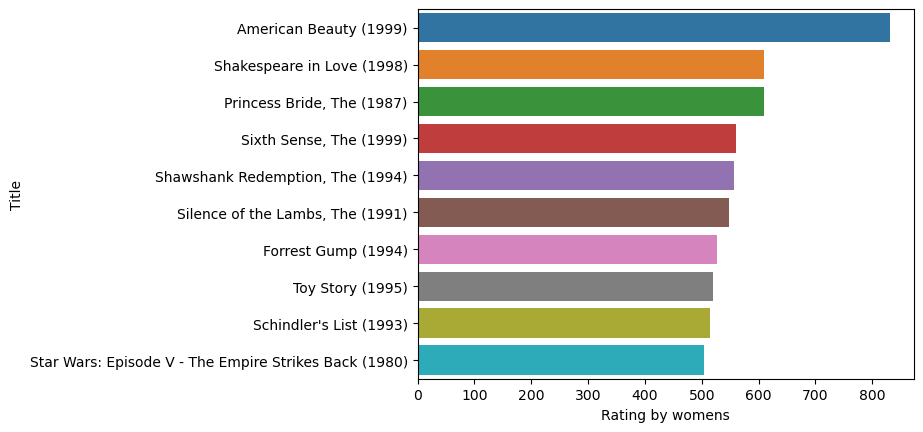

In [25]:
pl_M = sns.barplot(data=rbaf, y = rbaf.index, x = 'F')
pl_M.set_xlabel('Rating by womens')
pl_M.set_ylabel('Title')
pl_M